# Term Project: Predictive Modelling for Customer Churn

**Done By:** 

| Student Name    | Student ID |
|---------------- |------------|
| Zahraa Fadhel   | 202209444  |
| Zahra Mohd Redha| 202203876  |


## 1. Project Overview

Predicting customer churn—when customers stop using a company's products or services—is a high-priority business problem because retaining an existing customer is typically far less expensive than acquiring a new one. This project asks us to design, implement, and evaluate a machine learning pipeline that predicts which customers are likely to churn, using the Telco Customer Churn dataset. We will work through the full data-science lifecycle: data exploration, cleaning and preprocessing, feature engineering, model selection and training, evaluation using appropriate metrics, and interpretation of results with business-focused recommendations.


## 2. Dataset Information

We will be working with the **"Telco Customer Churn"** dataset from Kaggle, which contains information about a telecommunications company's customers and whether they churned in the last month.

**Dataset Link:** https://www.kaggle.com/datasets/blastchar/telco-customer-churn

**Key Features:**
- **Customer Demographics:** gender, SeniorCitizen, Partner, Dependents
- **Account Information:** tenure, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges
- **Services:** PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies
- **Target Variable:** Churn (Yes/No)


## 3. Project Workflow

This notebook follows a structured approach:

1. **Data Loading and Initial Exploration**

---

*Let's begin our journey into predictive modeling for customer churn!*

# Part 1: Data Loading and Initial Exploration

In [2]:
# Load the WA_Fn-UseC_-Telco-Customer-Churn.csv dataset into a Pandas DataFrame.
import pandas as pd
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

# Display the first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# check data types
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [4]:
# Identify missing values. (There are no missing values)
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [5]:
# check nan values 
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [6]:
# unique values in each column
df.nunique()

customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

In [7]:
# Display unique values for categorical columns
print("MultipleLines:", df['MultipleLines'].unique())
print("InternetService:", df['InternetService'].unique())
print("OnlineSecurity:", df['OnlineSecurity'].unique())
print("OnlineBackup:", df['OnlineBackup'].unique())
print("DeviceProtection:", df['DeviceProtection'].unique())
print("TechSupport:", df['TechSupport'].unique())
print("StreamingTV:", df['StreamingTV'].unique())
print("StreamingMovies:", df['StreamingMovies'].unique())
print("Contract:", df['Contract'].unique())
print("PaymentMethod:", df['PaymentMethod'].unique())

MultipleLines: ['No phone service' 'No' 'Yes']
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: ['No' 'Yes' 'No internet service']
OnlineBackup: ['Yes' 'No' 'No internet service']
DeviceProtection: ['No' 'Yes' 'No internet service']
TechSupport: ['No' 'Yes' 'No internet service']
StreamingTV: ['No' 'Yes' 'No internet service']
StreamingMovies: ['No' 'Yes' 'No internet service']
Contract: ['Month-to-month' 'One year' 'Two year']
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [8]:
# Summarize descriptive statistics for numerical features.
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


DATASET OVERVIEW BEFORE PREPROCESSING
Dataset shape: (7043, 21)
Total customers: 7,043
Churn rate: 26.5%
Missing values: 0

FEATURE DISTRIBUTION SUMMARY
Data Types:
object     18
int64       2
float64     1
Name: count, dtype: int64

Categorical Features Value Counts:

Contract:
Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

InternetService:
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64

PaymentMethod:
PaymentMethod
Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: count, dtype: int64

Numerical Features Summary:
            tenure  MonthlyCharges
count  7043.000000     7043.000000
mean     32.371149       64.761692
std      24.559481       30.090047
min       0.000000       18.250000
25%       9.000000       35.500000
50%      29.000000       70.350000
75%      55.000000       89.85

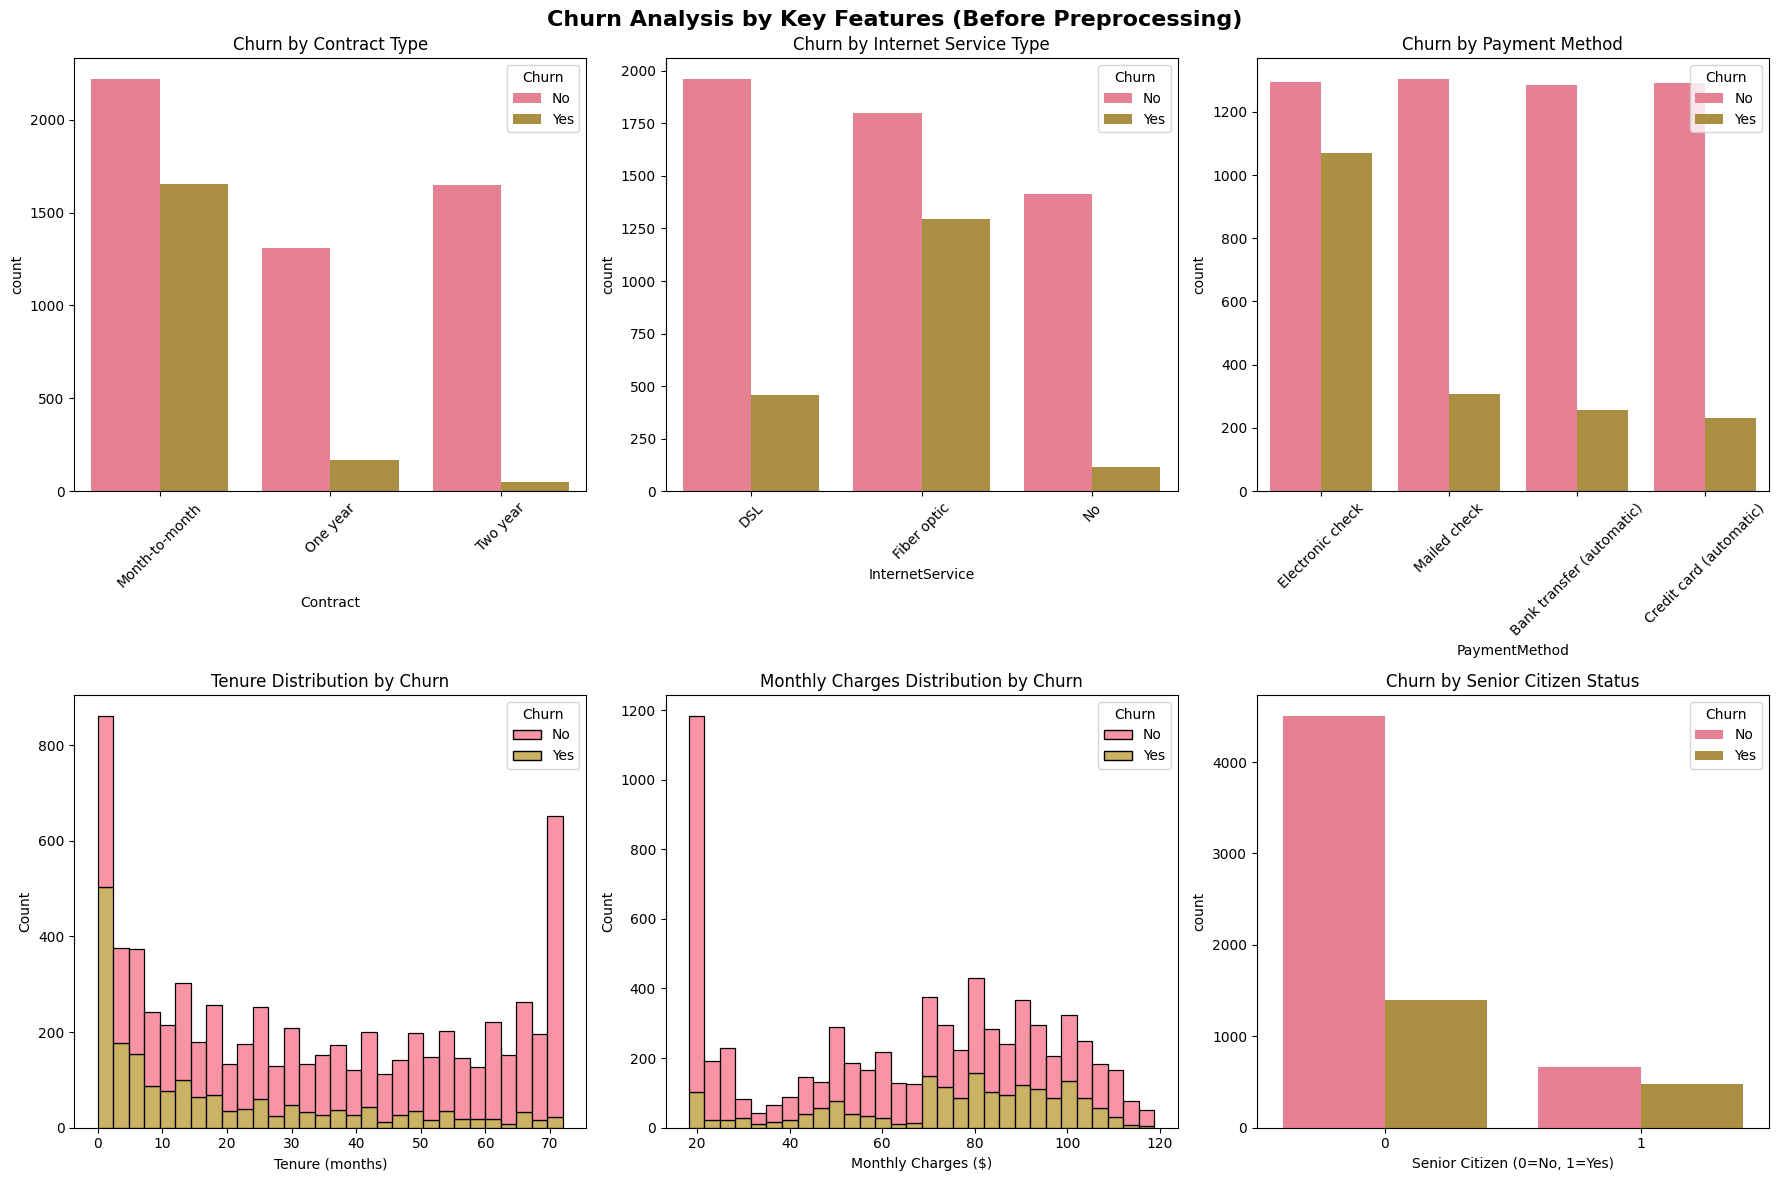


SERVICE USAGE PATTERNS


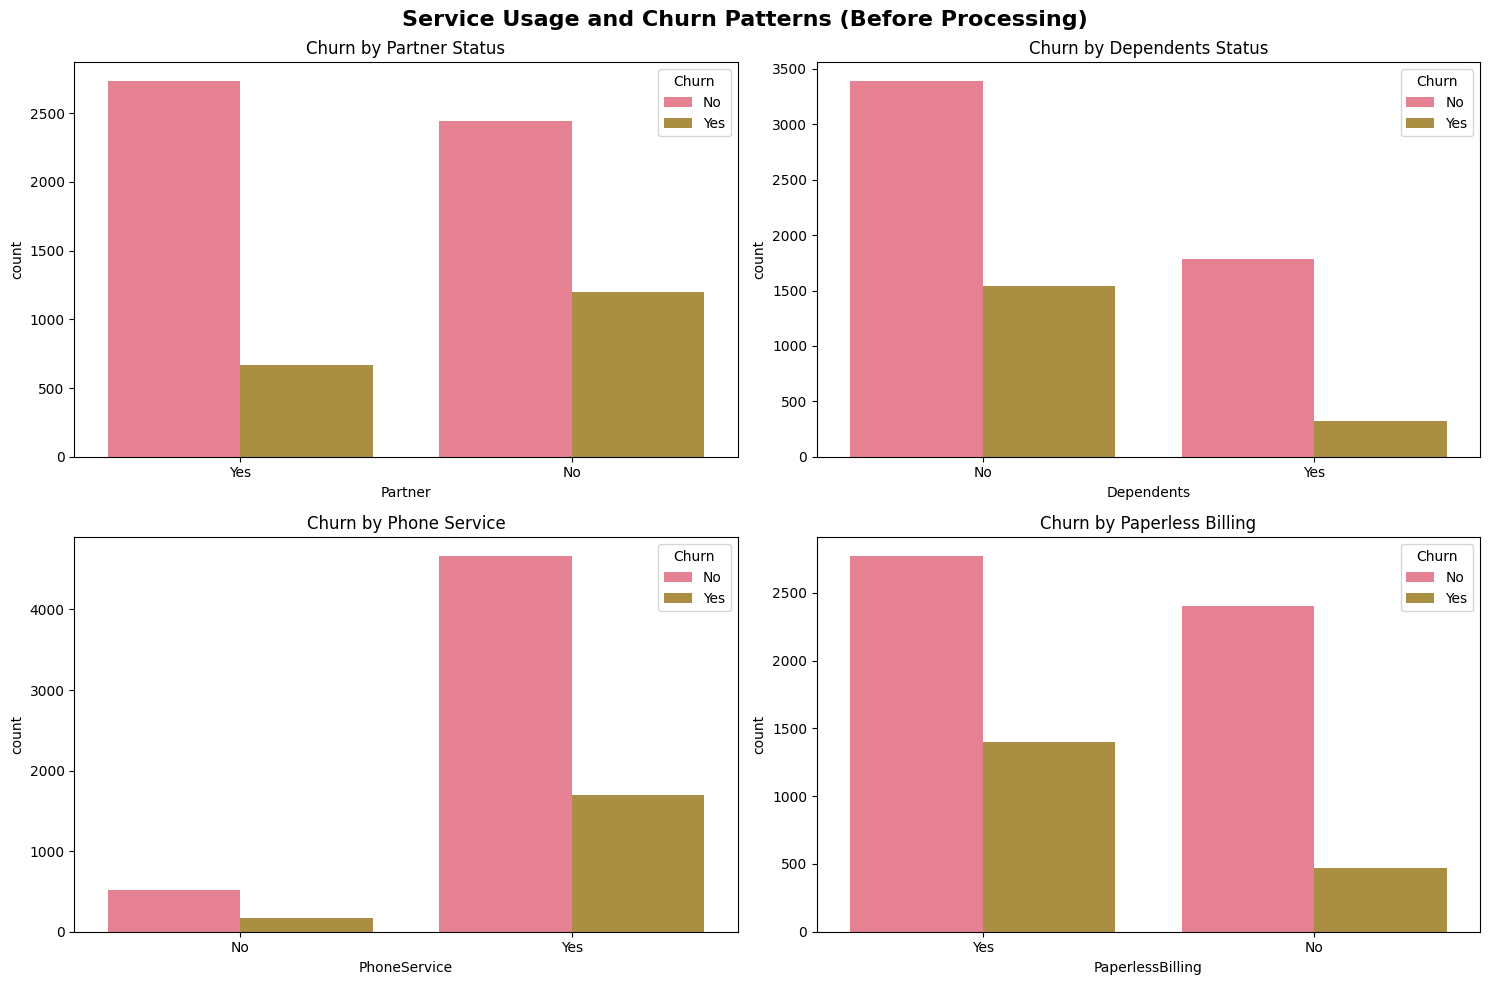


KEY INSIGHTS FROM INITIAL EDA
Overall Statistics:
  - Total customers: 7,043
  - Churned customers: 1,869
  - Overall churn rate: 26.5%

Contract Analysis:
  - Month-to-month: 42.7% churn rate
  - One year: 11.3% churn rate
  - Two year: 2.8% churn rate

Internet Service Analysis:
  - DSL: 19.0% churn rate
  - Fiber optic: 41.9% churn rate
  - No: 7.4% churn rate

Payment Method Analysis:
  - Bank transfer (automatic): 16.7% churn rate
  - Credit card (automatic): 15.2% churn rate
  - Electronic check: 45.3% churn rate
  - Mailed check: 19.1% churn rate

Tenure Analysis:
  - Short tenure (≤12 months): 47.4% churn rate
  - Long tenure (>12 months): 17.1% churn rate

Demographic Analysis:
  - Female: 26.9% churn rate
  - Male: 26.2% churn rate
  - Non-Senior Citizens: 23.6% churn rate
  - Senior Citizens: 41.7% churn rate


In [9]:
# Perform initial EDA to understand the distribution of features and their relationship with the target variable.
# Visualize key insights (e.g., churn rate by contract type, internet service, tenure).

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# 1. Dataset Overview (Before Preprocessing)
print("DATASET OVERVIEW BEFORE PREPROCESSING")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Total customers: {len(df):,}")
print(f"Churn rate: {(df['Churn'] == 'Yes').sum() / len(df) * 100:.1f}%")
print(f"Missing values: {df.isnull().sum().sum()}")

# 2. Feature Distribution Analysis
print("\nFEATURE DISTRIBUTION SUMMARY")
print("="*50)

# Check data types
print("Data Types:")
print(df.dtypes.value_counts())

# Categorical features summary
categorical_cols = ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 
                   'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
                   'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
                   'PaperlessBilling', 'PaymentMethod', 'Churn']

print(f"\nCategorical Features Value Counts:")
for col in ['Contract', 'InternetService', 'PaymentMethod']:
    print(f"\n{col}:")
    print(df[col].value_counts())

# Numerical features
numerical_cols = ['tenure', 'MonthlyCharges']
print(f"\nNumerical Features Summary:")
print(df[numerical_cols].describe())

# 3. Churn Analysis by Features
print("\nCHURN ANALYSIS BY KEY FEATURES")
print("="*50)

# Create subplots for churn analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Churn Analysis by Key Features (Before Preprocessing)', fontsize=16, fontweight='bold')

# Contract vs Churn
sns.countplot(data=df, x='Contract', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Contract Type')
axes[0,0].tick_params(axis='x', rotation=45)

# Internet Service vs Churn
sns.countplot(data=df, x='InternetService', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Internet Service Type')
axes[0,1].tick_params(axis='x', rotation=45)

# Payment Method vs Churn
sns.countplot(data=df, x='PaymentMethod', hue='Churn', ax=axes[0,2])
axes[0,2].set_title('Churn by Payment Method')
axes[0,2].tick_params(axis='x', rotation=45)

# Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30, ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn')
axes[1,0].set_xlabel('Tenure (months)')

# Monthly charges distribution by churn
sns.histplot(data=df, x='MonthlyCharges', hue='Churn', multiple='stack', bins=30, ax=axes[1,1])
axes[1,1].set_title('Monthly Charges Distribution by Churn')
axes[1,1].set_xlabel('Monthly Charges ($)')

# Senior citizen vs churn
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', ax=axes[1,2])
axes[1,2].set_title('Churn by Senior Citizen Status')
axes[1,2].set_xlabel('Senior Citizen (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# 4. Additional Analysis - Service Usage Patterns
print("\nSERVICE USAGE PATTERNS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Service Usage and Churn Patterns (Before Processing)', fontsize=16, fontweight='bold')

# Partner vs Churn
sns.countplot(data=df, x='Partner', hue='Churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Partner Status')

# Dependents vs Churn
sns.countplot(data=df, x='Dependents', hue='Churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Dependents Status')

# Phone Service vs Churn
sns.countplot(data=df, x='PhoneService', hue='Churn', ax=axes[1,0])
axes[1,0].set_title('Churn by Phone Service')

# Paperless Billing vs Churn
sns.countplot(data=df, x='PaperlessBilling', hue='Churn', ax=axes[1,1])
axes[1,1].set_title('Churn by Paperless Billing')

plt.tight_layout()
plt.show()

# 5. Key Insights Summary
print("\nKEY INSIGHTS FROM INITIAL EDA")
print("="*50)
churn_count = (df['Churn'] == 'Yes').sum()
total_customers = len(df)
churn_rate = (churn_count / total_customers) * 100

print(f"Overall Statistics:")
print(f"  - Total customers: {total_customers:,}")
print(f"  - Churned customers: {churn_count:,}")
print(f"  - Overall churn rate: {churn_rate:.1f}%")

# Contract insights
contract_churn = df.groupby('Contract')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nContract Analysis:")
for contract, rate in contract_churn.items():
    print(f"  - {contract}: {rate:.1f}% churn rate")

# Internet service insights
internet_churn = df.groupby('InternetService')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nInternet Service Analysis:")
for service, rate in internet_churn.items():
    print(f"  - {service}: {rate:.1f}% churn rate")

# Payment method insights
payment_churn = df.groupby('PaymentMethod')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nPayment Method Analysis:")
for method, rate in payment_churn.items():
    print(f"  - {method}: {rate:.1f}% churn rate")

# Tenure insights
short_tenure_churn = df[df['tenure'] <= 12]['Churn'].apply(lambda x: x == 'Yes').mean() * 100
long_tenure_churn = df[df['tenure'] > 12]['Churn'].apply(lambda x: x == 'Yes').mean() * 100
print(f"\nTenure Analysis:")
print(f"  - Short tenure (≤12 months): {short_tenure_churn:.1f}% churn rate")
print(f"  - Long tenure (>12 months): {long_tenure_churn:.1f}% churn rate")

# Demographic insights
gender_churn = df.groupby('gender')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"\nDemographic Analysis:")
for gender, rate in gender_churn.items():
    print(f"  - {gender}: {rate:.1f}% churn rate")

senior_churn = df.groupby('SeniorCitizen')['Churn'].apply(lambda x: (x == 'Yes').mean() * 100)
print(f"  - Non-Senior Citizens: {senior_churn[0]:.1f}% churn rate")
print(f"  - Senior Citizens: {senior_churn[1]:.1f}% churn rate")

# Part 2: Data Preprocessing and Feature Engineering

In [10]:
# No missing values found as df.isnull().sum() outputs all zeros

In [11]:
# Drop customerID because it doesn't help in predictive
df.drop('customerID', axis=1, inplace=True)

In [12]:
# convert TotalCharges to numeric, coerce errors to NaN
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [13]:
# TotalCharges has 11 NaN values. Impute missing value using median imputation from sklearn.
from sklearn.impute import SimpleImputer

# Create an imputer that fills missing values with the median
imputer = SimpleImputer(strategy='median')

# Fit on the column and transform it
df['TotalCharges'] = imputer.fit_transform(df[['TotalCharges']])

# Verify no NaNs remain
print("NaNs after imputation:", df['TotalCharges'].isna().sum())


NaNs after imputation: 0


### Convert categorical features into numerical representations (e.g., one-hot encoding, label encoding). Explain your choices.

### It is better to store attributes with 2 values only (e.g Yes/No) to 0 representing No(False) and 1 representing Yes(True). These attributes are: SeniorCitizen, Partner, Dependents, PhoneService, Multiple Lines, OnlineSecurity, onlineBackUp, DeviceProtection, TechsSupport, StreamingTV, StreamingMovies, PaperlessBilling and the target attribute Churn 

### Why we choose 0 and 1 to represent true/false values instead of boolean ?
1. ML compatibility: All scikit-learn models work seamlessly with int features
2. Consistent numerical processing: No dtype conversion needed during model training
3. Better performance: Faster computations
4. Cleaner pipeline: No special handling required for boolean columns

In [14]:
# Convert 'Partner' to int representing boolean
df['Partner'] = df['Partner'].map({'Yes': 1, 'No': 0})

# Convert 'Dependents' to int representing boolean
df['Dependents'] = df['Dependents'].map({'Yes': 1, 'No': 0})

# Convert 'PhoneService' to int representing boolean
df['PhoneService'] = df['PhoneService'].map({'Yes': 1, 'No': 0})

# Convert 'MultipleLines' to int representing boolean
df['MultipleLines'] = df['MultipleLines'].map({'Yes': 1, 'No': 0, 'No phone service': 0})

# Convert 'OnlineSecurity' to int representing boolean
df['OnlineSecurity'] = df['OnlineSecurity'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'OnlineBackup' to int representing boolean
df['OnlineBackup'] = df['OnlineBackup'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'DeviceProtection' to int representing boolean
df['DeviceProtection'] = df['DeviceProtection'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'TechSupport' to int representing boolean
df['TechSupport'] = df['TechSupport'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'StreamingTV' to int representing boolean
df['StreamingTV'] = df['StreamingTV'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'StreamingMovies' to int representing boolean
df['StreamingMovies'] = df['StreamingMovies'].map({'Yes': 1, 'No': 0, 'No internet service': 0})

# Convert 'PaperlessBilling' to int representing boolean
df['PaperlessBilling'] = df['PaperlessBilling'].map({'Yes': 1, 'No': 0})

# Convert 'Churn' to int representing boolean
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

# Check data types again
df.dtypes

gender               object
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
InternetService      object
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract             object
PaperlessBilling      int64
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object

### Convert categorical features into numerical representations (e.g., one-hot encoding, label encoding). Explain your choices.

### Convert gender to numerical values
#### Using Label encoding (0/1), Why? Becauaes there are only 2 categories with no no ordinal relationship

In [15]:
# Convert gender to binary encoding
df['gender'] = df['gender'].map({'Male': 1, 'Female': 0})

### Convert Contract to numerical values
#### Using Ordinal encoding (0, 1, 2), Why? Becauaes there are 3 values with clear ordinal relationship as longer contracts show increasing commitment

In [16]:
# Convert Contract to ordinal encoding (commitment level)
df['Contract'] = df['Contract'].map({
    'Month-to-month': 0,
    'One year': 1, 
    'Two year': 2
})

### Convert PaymentMethod to numerical values
#### Using One-hot encoding, Why? Becauaes there are 4 categories with no ordinal relationship, so we need to avoid artificial ordering

In [17]:
# One-hot encode PaymentMethod
# converts 'PaymentMethod' col into multiple binary (0/1) columns — one for each unique category with prefix 'Payment'
payment_dummies = pd.get_dummies(df['PaymentMethod'], prefix='Payment').astype(int)
df = pd.concat([df, payment_dummies], axis=1)
df.drop('PaymentMethod', axis=1, inplace=True) # remove original column

### Convert InternetService to numerical values
#### Using One-hot encoding, Why? Becauaes there are 3 categories representing different service types and no clear ordering

In [18]:
# One-hot encode InternetService
# converts 'InternetService' col into multiple binary (0/1) columns — one for each unique category with prefix 'Internet'
internet_dummies = pd.get_dummies(df['InternetService'], prefix='Internet').astype(int)
df = pd.concat([df, internet_dummies], axis=1)
df.drop('InternetService', axis=1, inplace=True) # remove original column

In [19]:
# Get cols
cols = df.columns.tolist()
print("Current columns:")
print(cols)

# Uniform column names to snake_case
column_mapping = {
    'SeniorCitizen': 'senior_citizen',
    'PhoneService': 'phone_service',
    'MultipleLines': 'multiple_lines',
    'OnlineSecurity': 'online_security',
    'OnlineBackup': 'online_backup',
    'DeviceProtection': 'device_protection',
    'TechSupport': 'tech_support',
    'StreamingTV': 'streaming_tv',
    'StreamingMovies': 'streaming_movies',
    'PaperlessBilling': 'paperless_billing',
    'MonthlyCharges': 'monthly_charges',
    'TotalCharges': 'total_charges',
    'Partner': 'partner',
    'Dependents': 'dependents',
    'Contract': 'contract',
    'Churn': 'churn',
    'Payment_Bank transfer (automatic)': 'payment_bank_transfer',
    'Payment_Credit card (automatic)': 'payment_credit_card',
    'Payment_Electronic check': 'payment_electronic_check',
    'Payment_Mailed check': 'payment_mailed_check',
    'Internet_DSL': 'internet_dsl',
    'Internet_Fiber optic': 'internet_fiber_optic',
    'Internet_No': 'internet_no'
}

# Rename columns
df.rename(columns=column_mapping, inplace=True)

# reinsert 'chrun' at the end if needed
df['churn'] = df.pop('churn')

print(f"\nUniform columns ({len(df.columns)} total):")
print(df.columns.tolist())


Current columns:
['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn', 'Payment_Bank transfer (automatic)', 'Payment_Credit card (automatic)', 'Payment_Electronic check', 'Payment_Mailed check', 'Internet_DSL', 'Internet_Fiber optic', 'Internet_No']

Uniform columns (25 total):
['gender', 'senior_citizen', 'partner', 'dependents', 'tenure', 'phone_service', 'multiple_lines', 'online_security', 'online_backup', 'device_protection', 'tech_support', 'streaming_tv', 'streaming_movies', 'contract', 'paperless_billing', 'monthly_charges', 'total_charges', 'payment_bank_transfer', 'payment_credit_card', 'payment_electronic_check', 'payment_mailed_check', 'internet_dsl', 'internet_fiber_optic', 'internet_no', 'churn']


#### We noticed we have 'Internet_No' which we'll be using to determine if customer has customer or not. Internet_No = 1 means the customer has NO internet service. Internet_DSL = 1 means the customer has DSL. Internet_Fiber optic = 1 means the customer has Fiber optic.

In [20]:
# datatypes after preprocessingp
df.dtypes

gender                        int64
senior_citizen                int64
partner                       int64
dependents                    int64
tenure                        int64
phone_service                 int64
multiple_lines                int64
online_security               int64
online_backup                 int64
device_protection             int64
tech_support                  int64
streaming_tv                  int64
streaming_movies              int64
contract                      int64
paperless_billing             int64
monthly_charges             float64
total_charges               float64
payment_bank_transfer         int64
payment_credit_card           int64
payment_electronic_check      int64
payment_mailed_check          int64
internet_dsl                  int64
internet_fiber_optic          int64
internet_no                   int64
churn                         int64
dtype: object

In [21]:
# first few cols after preprocessing
df.head()

,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,online_security,online_backup,device_protection,...,monthly_charges,total_charges,payment_bank_transfer,payment_credit_card,payment_electronic_check,payment_mailed_check,internet_dsl,internet_fiber_optic,internet_no,churn
0,0,0,1,0,1,0,0,0,1,0,...,29.85,29.85,0,0,1,0,1,0,0,0
1,1,0,0,0,34,1,0,1,0,1,...,56.95,1889.50,0,0,0,1,1,0,0,0
2,1,0,0,0,2,1,0,1,1,0,...,53.85,108.15,0,0,0,1,1,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,42.30,1840.75,1,0,0,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,70.70,151.65,0,0,1,0,0,1,0,1


### Scale numerical features to ensure no single feature dominates the model training.

In [22]:
from sklearn.preprocessing import StandardScaler

# Identify numerical features that need scaling
numerical_features = ['tenure', 'monthly_charges', 'total_charges']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the numerical features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display statistics after scaling
print("Numerical Features After Scaling:")
print("="*50)
print(df[numerical_features].describe().round(3))

print(f"\n** Mean of scaled features should be ~0, std should be ~1 **")

# Verify scaling
print("\nVerification:")
for col in numerical_features:
    print(f"{col}: mean={df[col].mean():.4f}, std={df[col].std():.4f}")

# Display first few rows to see scaled values 
print("\nFirst 5 rows of scaled features:")
print(df[numerical_features].head())

Numerical Features After Scaling:
         tenure  monthly_charges  total_charges
count  7043.000         7043.000       7043.000
mean     -0.000           -0.000         -0.000
std       1.000            1.000          1.000
min      -1.318           -1.546         -0.999
25%      -0.952           -0.973         -0.830
50%      -0.137            0.186         -0.390
75%       0.921            0.834          0.664
max       1.614            1.794          2.827

** Mean of scaled features should be ~0, std should be ~1 **

Verification:
tenure: mean=-0.0000, std=1.0001
monthly_charges: mean=-0.0000, std=1.0001
total_charges: mean=-0.0000, std=1.0001

First 5 rows of scaled features:
     tenure  monthly_charges  total_charges
0 -1.277445        -1.160323      -0.994242
1  0.066327        -0.259629      -0.173244
2 -1.236724        -0.362660      -0.959674
3  0.514251        -0.746535      -0.194766
4 -1.236724         0.197365      -0.940470


DATASET OVERVIEW AFTER PREPROCESSING
Dataset shape: (7043, 25)
Total customers: 7,043
Churn rate: 26.5%
Missing values: 0

FEATURE DISTRIBUTION SUMMARY
Continuous Features:
        tenure  monthly_charges  total_charges
count  7043.00          7043.00        7043.00
mean     -0.00            -0.00          -0.00
std       1.00             1.00           1.00
min      -1.32            -1.55          -1.00
25%      -0.95            -0.97          -0.83
50%      -0.14             0.19          -0.39
75%       0.92             0.83           0.66
max       1.61             1.79           2.83

Binary Features (% of customers with feature = 1):
gender: 50.5%
senior_citizen: 16.2%
partner: 48.3%
dependents: 30.0%
phone_service: 90.3%
multiple_lines: 42.2%
online_security: 28.7%
online_backup: 34.5%
device_protection: 34.4%
tech_support: 29.0%
streaming_tv: 38.4%
streaming_movies: 38.8%
paperless_billing: 59.2%

CHURN ANALYSIS BY KEY FEATURES


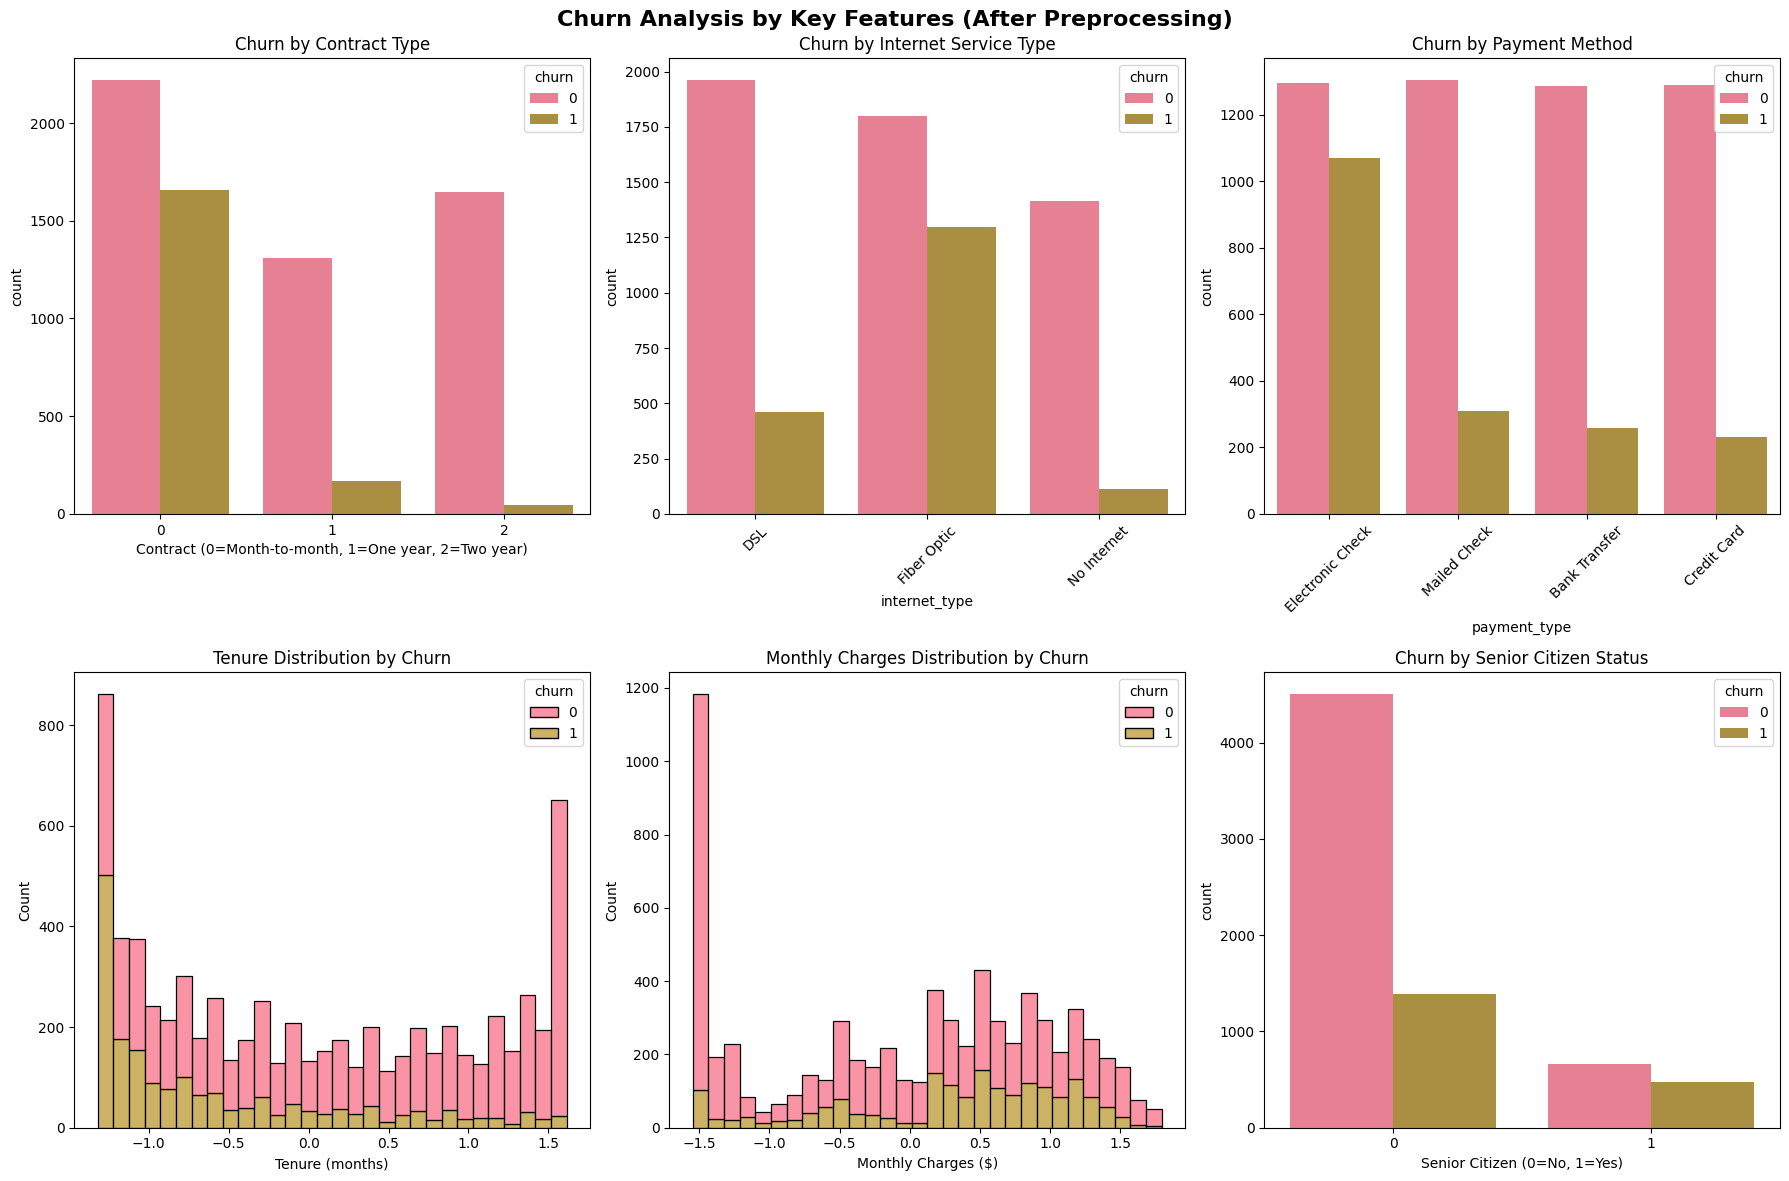

In [23]:
# Perform initial EDA to understand the distribution of features and their relationship with the target variable after preprocessing

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

# 1. Dataset Overview
print("DATASET OVERVIEW AFTER PREPROCESSING")
print("="*50)
print(f"Dataset shape: {df.shape}")
print(f"Total customers: {len(df):,}")
print(f"Churn rate: {(df['churn'].sum() / len(df)) * 100:.1f}%")
print(f"Missing values: {df.isnull().sum().sum()}")

# 2. Feature Distribution Analysis
print("\nFEATURE DISTRIBUTION SUMMARY")
print("="*50)

# Continuous features
continuous_cols = ['tenure', 'monthly_charges', 'total_charges']
print("Continuous Features:")
print(df[continuous_cols].describe().round(2))

# Binary features summary
binary_cols = ['gender', 'senior_citizen', 'partner', 'dependents', 'phone_service', 
               'multiple_lines', 'online_security', 'online_backup', 'device_protection',
               'tech_support', 'streaming_tv', 'streaming_movies', 'paperless_billing']

print(f"\nBinary Features (% of customers with feature = 1):")
for col in binary_cols:
    percentage = (df[col].sum() / len(df)) * 100
    print(f"{col}: {percentage:.1f}%")

# 3. Churn Analysis by Features
print("\nCHURN ANALYSIS BY KEY FEATURES")
print("="*50)

# Create subplots for churn analysis
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Churn Analysis by Key Features (After Preprocessing)', fontsize=16, fontweight='bold')

# Contract vs Churn
sns.countplot(data=df, x='contract', hue='churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Contract Type')
axes[0,0].set_xlabel('Contract (0=Month-to-month, 1=One year, 2=Two year)')

# Internet Service vs Churn
internet_data = df[['internet_dsl', 'internet_fiber_optic', 'internet_no', 'churn']]
internet_type = []
for _, row in df.iterrows():
    if row['internet_dsl'] == 1:
        internet_type.append('DSL')
    elif row['internet_fiber_optic'] == 1:
        internet_type.append('Fiber Optic')
    else:
        internet_type.append('No Internet')

df_temp = df.copy()
df_temp['internet_type'] = internet_type
sns.countplot(data=df_temp, x='internet_type', hue='churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Internet Service Type')
axes[0,1].tick_params(axis='x', rotation=45)

# Payment Method vs Churn
payment_type = []
payment_cols = ['payment_bank_transfer', 'payment_credit_card', 'payment_electronic_check', 'payment_mailed_check']
for _, row in df.iterrows():
    if row['payment_bank_transfer'] == 1:
        payment_type.append('Bank Transfer')
    elif row['payment_credit_card'] == 1:
        payment_type.append('Credit Card')
    elif row['payment_electronic_check'] == 1:
        payment_type.append('Electronic Check')
    else:
        payment_type.append('Mailed Check')

df_temp['payment_type'] = payment_type
sns.countplot(data=df_temp, x='payment_type', hue='churn', ax=axes[0,2])
axes[0,2].set_title('Churn by Payment Method')
axes[0,2].tick_params(axis='x', rotation=45)

# Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='churn', multiple='stack', bins=30, ax=axes[1,0])
axes[1,0].set_title('Tenure Distribution by Churn')
axes[1,0].set_xlabel('Tenure (months)')

# Monthly charges distribution by churn
sns.histplot(data=df, x='monthly_charges', hue='churn', multiple='stack', bins=30, ax=axes[1,1])
axes[1,1].set_title('Monthly Charges Distribution by Churn')
axes[1,1].set_xlabel('Monthly Charges ($)')

# Senior citizen vs churn
sns.countplot(data=df, x='senior_citizen', hue='churn', ax=axes[1,2])
axes[1,2].set_title('Churn by Senior Citizen Status')
axes[1,2].set_xlabel('Senior Citizen (0=No, 1=Yes)')

plt.tight_layout()
plt.show()


SERVICE USAGE PATTERNS (AFTER PREPROCESSING)


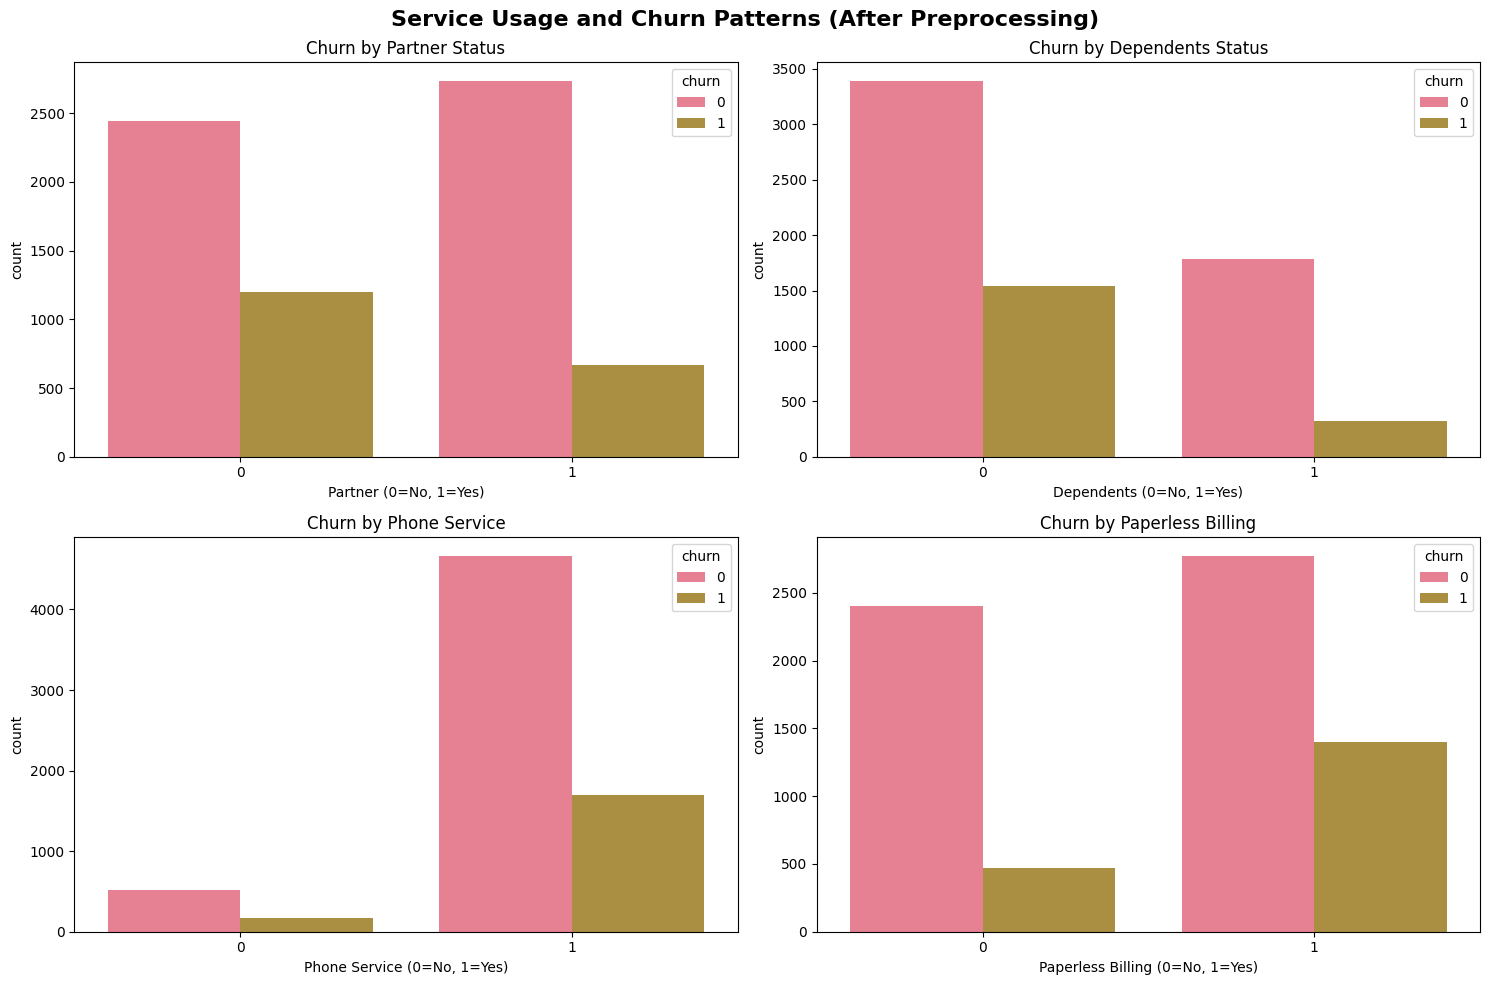


Service Usage Churn Analysis:
  - With Partner: 19.7% churn rate
  - Without Partner: 33.0% churn rate
  - With Dependents: 15.5% churn rate
  - Without Dependents: 31.3% churn rate
  - Paperless Billing: 33.6% churn rate
  - Non-Paperless Billing: 16.3% churn rate


In [24]:
print("\nSERVICE USAGE PATTERNS (AFTER PREPROCESSING)")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('Service Usage and Churn Patterns (After Preprocessing)', fontsize=16, fontweight='bold')

# Partner vs Churn
sns.countplot(data=df, x='partner', hue='churn', ax=axes[0,0])
axes[0,0].set_title('Churn by Partner Status')
axes[0,0].set_xlabel('Partner (0=No, 1=Yes)')

# Dependents vs Churn
sns.countplot(data=df, x='dependents', hue='churn', ax=axes[0,1])
axes[0,1].set_title('Churn by Dependents Status')
axes[0,1].set_xlabel('Dependents (0=No, 1=Yes)')

# Phone Service vs Churn
sns.countplot(data=df, x='phone_service', hue='churn', ax=axes[1,0])
axes[1,0].set_title('Churn by Phone Service')
axes[1,0].set_xlabel('Phone Service (0=No, 1=Yes)')

# Paperless Billing vs Churn
sns.countplot(data=df, x='paperless_billing', hue='churn', ax=axes[1,1])
axes[1,1].set_title('Churn by Paperless Billing')
axes[1,1].set_xlabel('Paperless Billing (0=No, 1=Yes)')

plt.tight_layout()
plt.show()

# Service usage churn analysis
print("\nService Usage Churn Analysis:")
partner_churn = df.groupby('partner')['churn'].mean() * 100
print(f"  - With Partner: {partner_churn[1]:.1f}% churn rate")
print(f"  - Without Partner: {partner_churn[0]:.1f}% churn rate")

dependents_churn = df.groupby('dependents')['churn'].mean() * 100
print(f"  - With Dependents: {dependents_churn[1]:.1f}% churn rate")
print(f"  - Without Dependents: {dependents_churn[0]:.1f}% churn rate")

paperless_churn = df.groupby('paperless_billing')['churn'].mean() * 100
print(f"  - Paperless Billing: {paperless_churn[1]:.1f}% churn rate")
print(f"  - Non-Paperless Billing: {paperless_churn[0]:.1f}% churn rate")


CORRELATION ANALYSIS
Top 10 features correlated with churn:
churn                       1.000
contract                   -0.397
tenure                     -0.352
internet_fiber_optic        0.308
payment_electronic_check    0.302
internet_no                -0.228
total_charges              -0.199
monthly_charges             0.193
paperless_billing           0.192
online_security            -0.171
tech_support               -0.165
Name: churn, dtype: float64


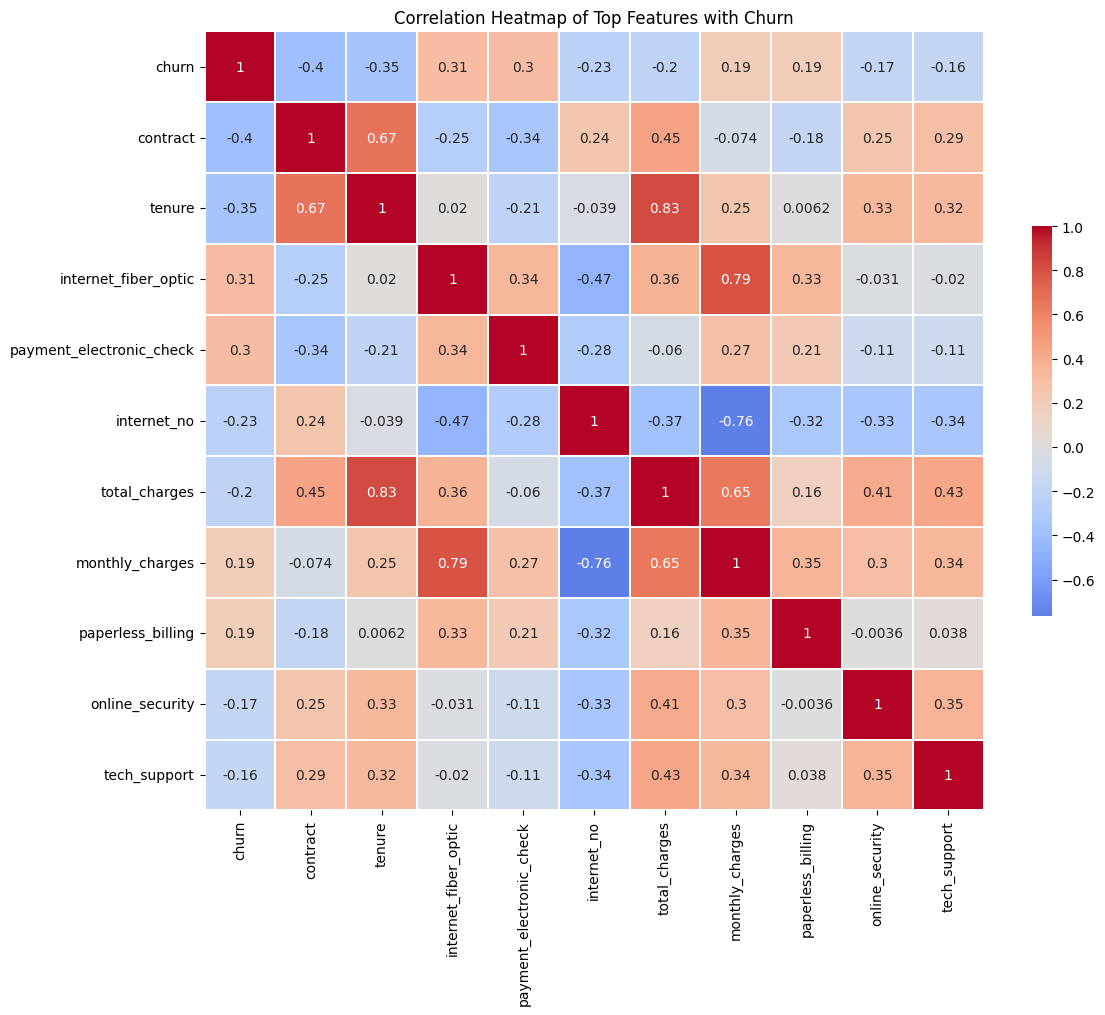

In [25]:
# 4. Correlation Analysis
print("\nCORRELATION ANALYSIS")
print("="*50)

# Calculate correlation with churn
correlations = df.corr()['churn'].sort_values(key=abs, ascending=False)
print("Top 10 features correlated with churn:")
print(correlations.head(11).round(3))  # 11 to exclude churn itself

# Correlation heatmap for top features
top_features = correlations.head(11).index.tolist()
plt.figure(figsize=(12, 10))
correlation_matrix = df[top_features].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.1, cbar_kws={"shrink": .5})
plt.title('Correlation Heatmap of Top Features with Churn')
plt.tight_layout()
plt.show()


In [26]:
# 5. Key Insights Summary
print("\nKEY INSIGHTS FROM EDA")
print("="*50)
churn_rate = (df['churn'].sum() / len(df)) * 100

# Contract insights
contract_churn = df.groupby('contract')['churn'].agg(['count', 'sum', 'mean'])
print(f"Contract Analysis:")
print(f"  - Month-to-month: {contract_churn.loc[0, 'mean']*100:.1f}% churn rate")
print(f"  - One year: {contract_churn.loc[1, 'mean']*100:.1f}% churn rate") 
print(f"  - Two year: {contract_churn.loc[2, 'mean']*100:.1f}% churn rate")

# Internet service insights
internet_churn_dsl = df[df['internet_dsl']==1]['churn'].mean()*100
internet_churn_fiber = df[df['internet_fiber_optic']==1]['churn'].mean()*100
internet_churn_no = df[df['internet_no']==1]['churn'].mean()*100
print(f"\nInternet Service Analysis:")
print(f"  - DSL: {internet_churn_dsl:.1f}% churn rate")
print(f"  - Fiber Optic: {internet_churn_fiber:.1f}% churn rate")
print(f"  - No Internet: {internet_churn_no:.1f}% churn rate")

# Tenure insights
short_tenure_churn = df[df['tenure'] <= 12]['churn'].mean()*100
long_tenure_churn = df[df['tenure'] > 12]['churn'].mean()*100
print(f"\nTenure Analysis:")
print(f"  - Short tenure (≤12 months): {short_tenure_churn:.1f}% churn rate")
print(f"  - Long tenure (>12 months): {long_tenure_churn:.1f}% churn rate")


KEY INSIGHTS FROM EDA
Contract Analysis:
  - Month-to-month: 42.7% churn rate
  - One year: 11.3% churn rate
  - Two year: 2.8% churn rate

Internet Service Analysis:
  - DSL: 19.0% churn rate
  - Fiber Optic: 41.9% churn rate
  - No Internet: 7.4% churn rate

Tenure Analysis:
  - Short tenure (≤12 months): 26.5% churn rate
  - Long tenure (>12 months): nan% churn rate


### Split the dataset into training and testing sets (e.g., 70% train, 30% test) ensuring proper stratification for the Churn variable.

In [27]:
from sklearn.model_selection import train_test_split

# Separate features (X) and target (y)
X = df.drop('churn', axis=1)
y = df['churn']

# Split the dataset: 70% train, 30% test with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.30, 
    random_state=42, 
    stratify=y  # to ensure balanced churn distribution in both sets
)

# Display split information
print("Dataset Split Summary:")
print("="*50)
print(f"Total samples: {len(df):,}")
print(f"Training samples: {len(X_train):,} ({len(X_train)/len(df)*100:.1f}%)")
print(f"Testing samples: {len(X_test):,} ({len(X_test)/len(df)*100:.1f}%)")

print(f"\nFeatures (X): {X.shape[1]} columns")
print(f"Target (y): churn")

# Verify stratification by checking churn distribution in train and test sets
print("\nChurn Distribution Verification:")
print("="*50)
print(f"Original dataset:")
print(f"  - Churn=0 (No): {(y==0).sum()} ({(y==0).sum()/len(y)*100:.1f}%)")
print(f"  - Churn=1 (Yes): {(y==1).sum()} ({(y==1).sum()/len(y)*100:.1f}%)")

print(f"\nTraining set:")
print(f"  - Churn=0 (No): {(y_train==0).sum()} ({(y_train==0).sum()/len(y_train)*100:.1f}%)")
print(f"  - Churn=1 (Yes): {(y_train==1).sum()} ({(y_train==1).sum()/len(y_train)*100:.1f}%)")

print(f"\nTesting set:")
print(f"  - Churn=0 (No): {(y_test==0).sum()} ({(y_test==0).sum()/len(y_test)*100:.1f}%)")
print(f"  - Churn=1 (Yes): {(y_test==1).sum()} ({(y_test==1).sum()/len(y_test)*100:.1f}%)")

print("\n✓ So this way to have stratification which is to ensure both sets have similar churn proportions")

Dataset Split Summary:
Total samples: 7,043
Training samples: 4,930 (70.0%)
Testing samples: 2,113 (30.0%)

Features (X): 24 columns
Target (y): churn

Churn Distribution Verification:
Original dataset:
  - Churn=0 (No): 5174 (73.5%)
  - Churn=1 (Yes): 1869 (26.5%)

Training set:
  - Churn=0 (No): 3622 (73.5%)
  - Churn=1 (Yes): 1308 (26.5%)

Testing set:
  - Churn=0 (No): 1552 (73.5%)
  - Churn=1 (Yes): 561 (26.5%)

✓ So this way to have stratification which is to ensure both sets have similar churn proportions


# Part 3: Model Building and Training

For model training we will use the following three models:

**1. Logistic Regression:**

*Underlying principles*

   linear classification model that predicts the probability that a data point belongs to a certain class (customer will churn (1) or not (0)) 
   It works by:
   * Computing a weighted sum of the input features
   * Passing that value through a sigmoid function
   * Outputting a probability between 0 and 1
   * Applying a threshold (usually 0.5) to determine the class

*Why it is suitable for customer churn prediction*
   * Customer churn often involves identifiable linear trends (e.g., “low tenure → high churn”)
   * It is highly interpretable, allowing you to see which features increase or decrease churn likelihood
   * A great baseline model to compare more complex models against
   * Quick to train and easy to evaluate


**2. Random Forest Classifier**

*Underlying principles*

Random Forest is an ensemble machine learning model that builds many decision trees and combines their outputs.
It includes:
  * Bagging: each tree is trained on a random subset of the training data.
  * Random Feature Selection: each split in a tree considers only a random sample of features.
  * Majority Voting: the final prediction is the majority vote across all trees.

*Why it is suitable for customer churn prediction*
  * Churn datasets often have complex, non-linear patterns, which trees naturally capture.
  * Performs well on tabular business data with mixed feature types.
  * Handles missing values and unscaled features effectively.
  * Provides feature importance rankings, helping interpret which factors drive churn.
  * Resistant to overfitting due to the ensemble approach.  
  * Handles outliers and high-dimesional data 


**3. Gradient Boosting Classifier (XGBoost)**

*Underlying principles*

XGBoost (Extreme Gradient Boosting) is a powerful gradient boosting algorithm designed for performance and flexibility.
It builds decision trees sequentially, where each new tree focuses on correcting the errors of the previous ensemble.
Key principles:
  * Boosting: each tree learns from the mistakes of the combined previous trees.
  * Regularized gradient optimization: minimizes prediction error while controlling model complexity (prevents overfitting).
  * Tree-based learning: constructs trees using a level-wise growth approach for balanced trees.

*Why it is suitable for customer churn prediction*
  * Churn prediction involves subtle patterns and interactions between features and boosting models capture these well.
  * XGBoost handles::
      * categorical variables (after encoding)
      * class imbalance (via scale_pos_weight)
      * non-linear relationships between features
  * Offers strong predictive performance on tabular data and is robust to overfitting with proper tuning.




### Model implementations and training 

In [28]:
# 1. Logistic regression implementation 
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

# Train model
logistic_regression = LogisticRegression(
    max_iter=1000,
    class_weight='balanced',   # for class imbalance
    solver='lbfgs'
)

logistic_regression.fit(X_train, y_train)

# Make predictions on test data ( test model )
y_pred = logistic_regression.predict(X_test)
y_prob = logistic_regression.predict_proba(X_test)[:, 1] # Get predicted probabilities for the positive class (churn=1)

# Print model intercept and coefficients
print("Intercept:", logistic_regression.intercept_[0])

coeff_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": logistic_regression.coef_[0]
}).sort_values(by="Coefficient", ascending=False)

# Display top positive and negative features
print("Top features increasing churn:\n", coeff_df.head(10))
print("\nTop features decreasing churn:\n", coeff_df.tail(10))

# Show first 20 predictions
print("Predicted churn (first 20 customers):", y_pred[:20])

# Preview first 20 probabilities
print("Predicted churn probabilities (first 20 customers):", y_prob[:20])


Intercept: -0.1855346610977243
Top features increasing churn:
                      Feature  Coefficient
22      internet_fiber_optic     0.783032
16             total_charges     0.578388
14         paperless_billing     0.380625
12          streaming_movies     0.317561
6             multiple_lines     0.252383
19  payment_electronic_check     0.214642
11              streaming_tv     0.187379
1             senior_citizen     0.145781
0                     gender     0.051583
21              internet_dsl     0.003119

Top features decreasing churn:
                   Feature  Coefficient
8           online_backup    -0.155772
17  payment_bank_transfer    -0.177972
18    payment_credit_card    -0.181631
3              dependents    -0.261380
5           phone_service    -0.328635
10           tech_support    -0.334300
7         online_security    -0.402621
13               contract    -0.724015
23            internet_no    -1.049903
4                  tenure    -1.203184
Predicted chu

If predicted probability ≥ 0.5 → predicts 1 (churn)

If predicted probability < 0.5 → predicts 0 (no churn)

In [29]:
# 2. Random forest classifier implementation 

from sklearn.ensemble import RandomForestClassifier


# Initialize the Random Forest Classifier
random_forest_model = RandomForestClassifier(
    n_estimators=100,       # number of trees
    max_depth=None,         # let trees grow fully
    class_weight='balanced',# handle class imbalance
    random_state=42
)

# Train model
random_forest_model.fit(X_train, y_train)

# Make predictions on test data ( test model )
y_pred_rf = random_forest_model.predict(X_test)              # predicted churn (0 or 1)
y_prob_rf = random_forest_model.predict_proba(X_test)[:, 1]  # probability of churn = 1

#  Display first 20 predictions and probabilities
print("Predicted churn (first 20 customers):", y_pred_rf[:20])
print("Predicted churn probabilities (first 20 customers):", y_prob_rf[:20])


# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': random_forest_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:\n", feature_importance.head(10))



Predicted churn (first 20 customers): [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Predicted churn probabilities (first 20 customers): [0.5  0.03 0.83 0.   0.   0.02 0.   0.03 0.28 0.02 0.12 0.36 0.17 0.06
 0.32 0.5  0.   0.07 0.42 0.01]

Top 10 most important features:
                      Feature  Importance
16             total_charges    0.166813
15           monthly_charges    0.160730
4                     tenure    0.151982
13                  contract    0.122506
19  payment_electronic_check    0.037619
22      internet_fiber_optic    0.036060
14         paperless_billing    0.027948
0                     gender    0.025675
7            online_security    0.023299
2                    partner    0.021850


In [30]:
#  Gradient boosting classifier (XGBoost) implementation 
from xgboost import XGBClassifier

# Class weight for imbalance
scale_pos_wt = len(y_train[y_train==0]) / len(y_train[y_train==1])

xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    n_estimators=300,
    learning_rate=0.05,
    max_depth=4,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=scale_pos_wt,
    random_state=42
)

xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)                  # predicted churn (0 or 1)
y_pred_xgb_prob = xgb_model.predict_proba(X_test)[:, 1]  # probability of churn = 1

# Display first 20 predictions
print("\nPredicted churn (first 20 customers):", y_pred_xgb[:20])
print("Predicted churn probabilities (first 20 customers):", y_pred_xgb_prob[:20])

# Feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:\n", importance.head(10))




Predicted churn (first 20 customers): [1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 1 0]
Predicted churn probabilities (first 20 customers): [0.79503995 0.00451337 0.91823024 0.03327622 0.01019652 0.0606826
 0.03686268 0.06639342 0.12497146 0.0204858  0.13745746 0.73580366
 0.17823589 0.07286842 0.618988   0.6718796  0.00757439 0.03073745
 0.7008395  0.00396365]

Top 10 most important features:
                      Feature  Importance
13                  contract    0.280563
22      internet_fiber_optic    0.181140
23               internet_no    0.083558
21              internet_dsl    0.045373
19  payment_electronic_check    0.041702
12          streaming_movies    0.039696
4                     tenure    0.033815
14         paperless_billing    0.025734
7            online_security    0.025231
5              phone_service    0.020645


### Tune hyperparameters for at least one of your chosen models using techniques like GridSearchCV or RandomizedSearchCV to optimize performance. 


#### Check baseline performance for each model before tuning model hyperparameters 

----- Logistic Regression base model Evaluation  -----
Accuracy: 0.7440
Precision (churn=1): 0.5114
Recall (churn=1): 0.7968
F1-Score (churn=1): 0.6230
ROC AUC Score: 0.8445
Confusion Matrix:
[[1125  427]
 [ 114  447]]


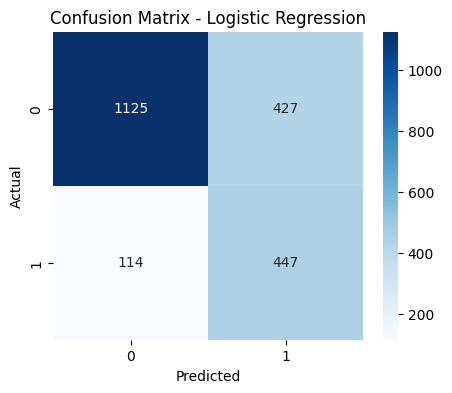

----- Random Forest base model Evaluation  -----
Accuracy: 0.7790
Precision (churn=1): 0.6103
Recall (churn=1): 0.4635
F1-Score (churn=1): 0.5268
ROC AUC Score: 0.8156
Confusion Matrix:
[[1386  166]
 [ 301  260]]


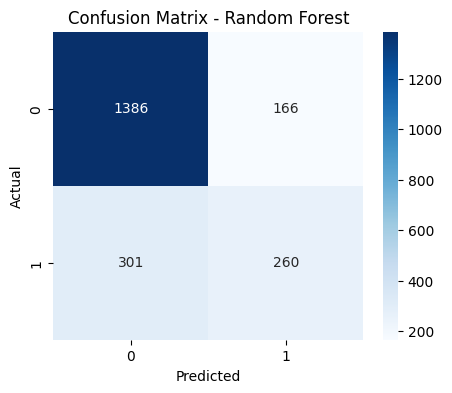

----- XGBoost base model Evaluation  -----
Accuracy: 0.7506
Precision (churn=1): 0.5205
Recall (churn=1): 0.7701
F1-Score (churn=1): 0.6211
ROC AUC Score: 0.8366
Confusion Matrix:
[[1154  398]
 [ 129  432]]


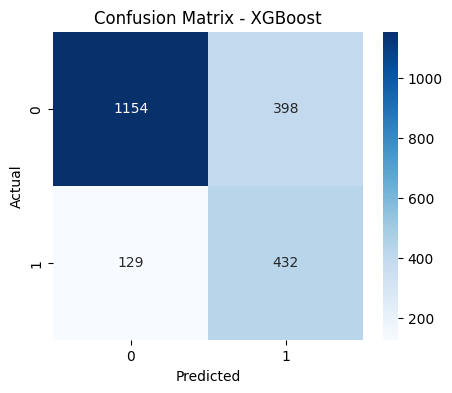

{'accuracy': 0.750591575958353,
 'precision': 0.5204819277108433,
 'recall': 0.7700534759358288,
 'f1': 0.621135873472322,
 'roc_auc': 0.8366193009537461}

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

def evaluate_model(model, X_test, y_test, model_name="Model"):
    """
    Evaluate a classification model and print key metrics.
    """
    # Predictions
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]  # probability of churn class (1)
    
    # Metrics
    acc = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_prob)
    cm = confusion_matrix(y_test, y_pred)
    
    print(f"----- {model_name} base model Evaluation  -----")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision (churn=1): {precision:.4f}")
    print(f"Recall (churn=1): {recall:.4f}")
    print(f"F1-Score (churn=1): {f1:.4f}")
    print(f"ROC AUC Score: {roc_auc:.4f}")
    print("Confusion Matrix:")
    print(cm)
    
    # Plot confusion matrix
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()
    
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1, "roc_auc": roc_auc}

# Logistic Regression
evaluate_model(logistic_regression, X_test, y_test, "Logistic Regression")

# Random Forest
evaluate_model(random_forest_model, X_test, y_test, "Random Forest")

# XGBoost
evaluate_model(xgb_model, X_test, y_test, "XGBoost")



TN (True Negative) → Predicted 0, actually 0 → correctly identified non-churners.

FP (False Positive) → Predicted 1, actually 0 → predicted churn but they didn’t churn (false alarm).

FN (False Negative) → Predicted 0, actually 1 → missed a churner.

TP (True Positive) → Predicted 1, actually 1 → correctly predicted churners.

#### Tune hyperparameters for the Random Forest Classifier and Gradient Boosting Classifier (XGBoost) models to optimize their perfomance

we will be using RandomizedSearchCV because it is faster and works well with large hyperparameter spaces

Fitting 5 folds for each of 50 candidates, totalling 250 fits
----- Random Forest (Tuned) base model Evaluation  -----
Accuracy: 0.7705
Precision (churn=1): 0.5495
Recall (churn=1): 0.7522
F1-Score (churn=1): 0.6351
ROC AUC Score: 0.8431
Confusion Matrix:
[[1206  346]
 [ 139  422]]


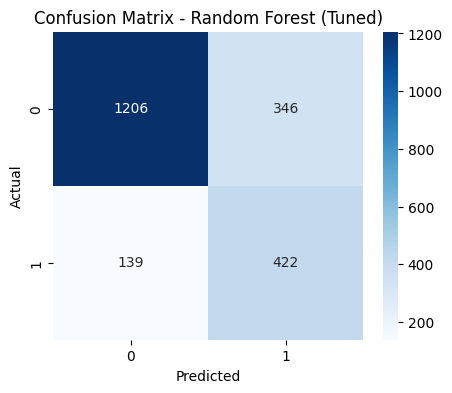


Top 10 most important features:
                      Feature  Importance
13                  contract    0.196866
4                     tenure    0.163723
16             total_charges    0.120380
15           monthly_charges    0.120231
22      internet_fiber_optic    0.063459
19  payment_electronic_check    0.056042
23               internet_no    0.039137
7            online_security    0.028178
14         paperless_billing    0.026583
21              internet_dsl    0.023714


In [35]:
# Tune hyperparameters for Random Forest Classifier model 
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter space
param_dist = {
    "n_estimators": randint(100, 500),
    "max_depth": randint(3, 20),
    "min_samples_split": randint(2, 20),
    "min_samples_leaf": randint(1, 10),
    "max_features": ["sqrt", "log2", None]
}

# Randomized search
rf_random = RandomizedSearchCV(
    estimator=random_forest_model,   # base model
    param_distributions=param_dist,
    n_iter=50,
    scoring='f1',
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

# Fit search
rf_random.fit(X_train, y_train)

# Get best model
best_rf = rf_random.best_estimator_
evaluate_model(best_rf, X_test, y_test, model_name="Random Forest (Tuned)")

# Feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:\n", importance.head(10))


Fitting 5 folds for each of 40 candidates, totalling 200 fits
----- XGBoost (Tuned) base model Evaluation  -----
Accuracy: 0.7549
Precision (churn=1): 0.5248
Recall (churn=1): 0.8111
F1-Score (churn=1): 0.6373
ROC AUC Score: 0.8467
Confusion Matrix:
[[1140  412]
 [ 106  455]]


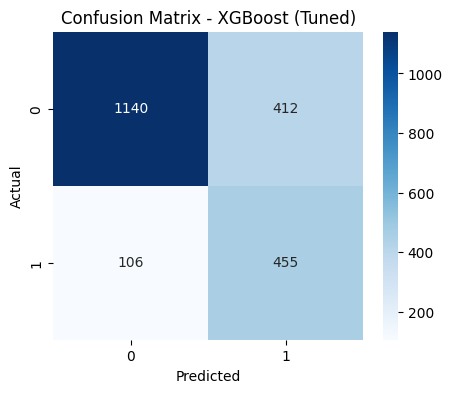


Top 10 most important features:
                      Feature  Importance
13                  contract    0.323285
22      internet_fiber_optic    0.133263
23               internet_no    0.070896
4                     tenure    0.051474
19  payment_electronic_check    0.048582
21              internet_dsl    0.039022
12          streaming_movies    0.029306
16             total_charges    0.026499
15           monthly_charges    0.023629
14         paperless_billing    0.023628


In [34]:
 # Tune hyperparameters for Gradient Boosting Classifier XGBoost model 
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [200, 300, 400, 500],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.03, 0.05, 0.1],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0],
    'gamma': [0, 1, 5],
    'reg_lambda': [1, 2, 5, 10],
    'reg_alpha': [0, 0.1, 0.3, 1],
    'scale_pos_weight': [1, scale_pos_wt]
}

xgb_model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="logloss",
    random_state=42
)

xgb_random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=40,            # number of combinations to try
    scoring='f1',         # or 'roc_auc'
    cv=5,
    verbose=2,
    random_state=42,
    n_jobs=-1
)

xgb_random_search.fit(X_train, y_train)


best_xgb = xgb_random_search.best_estimator_

evaluate_model(best_xgb, X_test, y_test, "XGBoost (Tuned)")

# Feature importance
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_xgb.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("\nTop 10 most important features:\n", importance.head(10))


# Part 4: Model Evaluation and Comparison

 #### Evaluate each trained model on the test set using appropriate classification metrics. Accuracy, Precision (for churn class), Recall (for churn class), F1-Score (for churn class), ROC AUC Score, Confusion Matrix. 


----- Logistic Regression base model Evaluation  -----
Accuracy: 0.7440
Precision (churn=1): 0.5114
Recall (churn=1): 0.7968
F1-Score (churn=1): 0.6230
ROC AUC Score: 0.8445
Confusion Matrix:
[[1125  427]
 [ 114  447]]


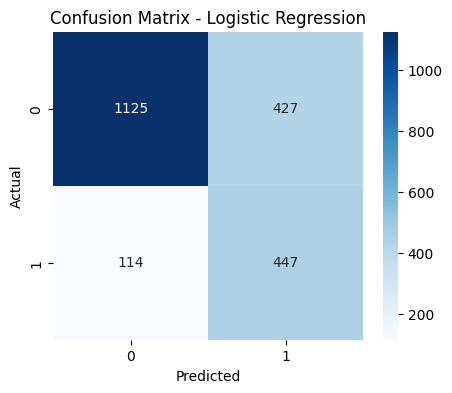

----- Random Forest (Tuned) base model Evaluation  -----
Accuracy: 0.7705
Precision (churn=1): 0.5495
Recall (churn=1): 0.7522
F1-Score (churn=1): 0.6351
ROC AUC Score: 0.8431
Confusion Matrix:
[[1206  346]
 [ 139  422]]


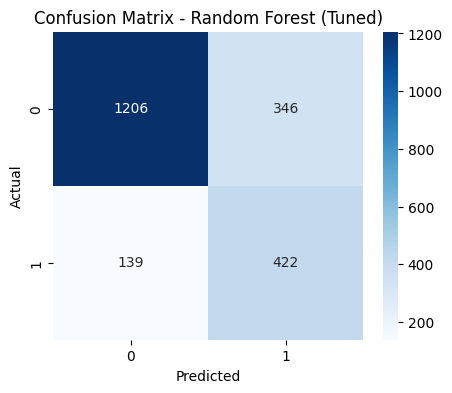

----- XGBoost (Tuned) base model Evaluation  -----
Accuracy: 0.7549
Precision (churn=1): 0.5248
Recall (churn=1): 0.8111
F1-Score (churn=1): 0.6373
ROC AUC Score: 0.8467
Confusion Matrix:
[[1140  412]
 [ 106  455]]


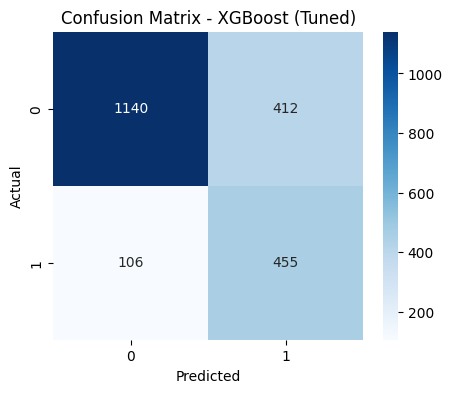

{'accuracy': 0.754850922858495,
 'precision': 0.52479815455594,
 'recall': 0.8110516934046346,
 'f1': 0.6372549019607843,
 'roc_auc': 0.8467017430214824}

In [ ]:
# Logistic regression model 
evaluate_model(logistic_regression, X_test, y_test, "Logistic Regression")

# Random forest classifier 
evaluate_model(best_rf, X_test, y_test, model_name="Random Forest (Tuned)")

# Gradient boosting classifier (XGBoost)
evaluate_model(best_xgb, X_test, y_test, "XGBoost (Tuned)")



#### Visualize the ROC curve for your best-performing models

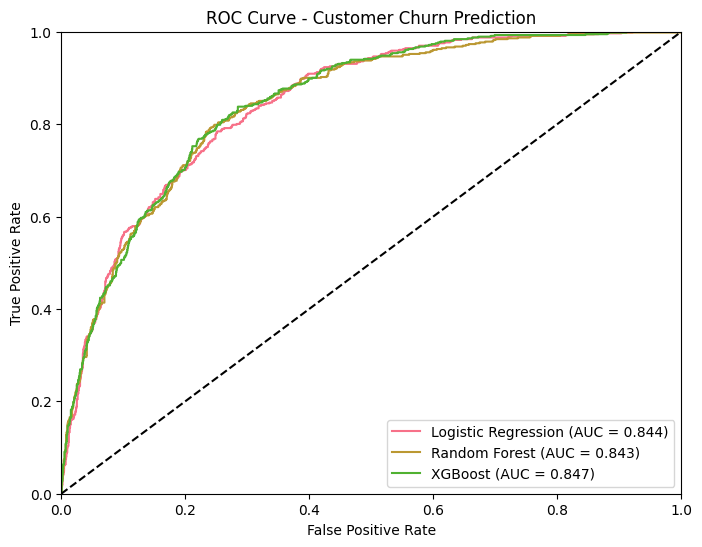

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities
y_prob_lr = logistic_regression.predict_proba(X_test)[:, 1]
y_prob_rf = best_rf.predict_proba(X_test)[:, 1]
y_prob_xgb = best_xgb.predict_proba(X_test)[:, 1]

# Compute ROC curves
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, y_prob_xgb)

# Compute AUC
roc_auc_lr = auc(fpr_lr, tpr_lr)
roc_auc_rf = auc(fpr_rf, tpr_rf)
roc_auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot
plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_lr:.3f})')
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_rf:.3f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {roc_auc_xgb:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Customer Churn Prediction')
plt.legend(loc='lower right')
plt.show()


#### Compare the performance of all models and discuss their strengths and weaknesses in the context of customer churn prediction. 

| Model                  | Accuracy | Precision (churn=1) | Recall (churn=1) | F1-score (churn=1) | ROC AUC |
|------------------------|---------|--------------------|-----------------|---------------------- |---------|
| Logistic Regression    | 0.7440  | 0.5114             | 0.7968          | 0.6230                | 0.8445  |
| Random Forest (Tuned)  | 0.7705  | 0.5495             | 0.7522          | 0.6351                | 0.8431  |
| XGBoost (Tuned)        | 0.7549  | 0.5248             | 0.8111          | 0.6373                | 0.8467  |


**Accuracy**

* Random Forest has the highest accuracy (0.7705).
* XGBoost is slightly lower (0.7549), and Logistic Regression is the lowest (0.7440).
* Accuracy alone isn’t enough here because churn is often imbalanced (fewer churners than non-churners).

**Precision**

* Measures how many predicted churners actually churned.
* Random Forest has the highest precision (0.5495), meaning fewer false positives.
* Logistic Regression is lowest (0.5114).
* XGBoost's precision (0.5248) is between that of Random forest and logistic regression 

**Recall**

* Measures how many actual churners we correctly identify.
* XGBoost has the highest recall (0.8111), followed by Logistic Regression (0.7968), and Random Forest is slightly lower (0.7522).
* In churn prediction, recall is crucial because missing a churner (false negative) could mean losing a customer.

**F1-score**

* Balances precision and recall.
* XGBoost: 0.6373 > Random Forest: 0.6351 > Logistic Regression: 0.6230.
* Suggests XGBoost balances recall and precision best.

**ROC AUC**
* XGBoost slightly edges out the others (0.8467), meaning it discriminates churners vs non-churners slightly better.

**Strengths and Weaknesses**

**1. Logistic Regression**

**Strengths:**
  * Simple and interpretable: easy to explain to business stakeholders which factors influence churn.
  * Good recall (0.7968): captures most of the actual churners, which is important for retention strategies.
  * Fast to train and deploy: minimal computational resources required.
  
**Weaknesses:**
  * Lower accuracy (0.7440) and precision (0.5114): more false positives; may waste resources contacting non-churners.
  * Limited capacity for complex patterns: may not capture nonlinear interactions in customer behavior.
 
 **Context in customer churn:** Logistic Regression is a good baseline for understanding key churn drivers but may miss complex patterns that advanced models can catch.


**1. Random Forest (Tuned)**

**Strengths:**
  * Highest accuracy (0.7705): predicts non-churners well, reducing wasted interventions.
  * Better precision (0.5495) than Logistic Regression: fewer false positives.
  * Handles nonlinear relationships and interactions: captures complex patterns in customer behavior.
  
**Weaknesses:**
  * Lower recall (0.7522) than XGBoost and Logistic Regression: misses more actual churners, which is risky if retention is critical.
  * Less interpretable than Logistic Regression: harder to explain the decision logic to business teams.
  * Slightly slower to train and predict: could be an issue with very large datasets.
 
 **Context in customer churn:** Random Forest is strong for a balance of accuracy and precision but may miss some churners compared to XGBoost.


**1. XGBoost (Tuned)**

**Strengths:**
  * Highest recall (0.8111): captures the most churners, minimizing missed retention opportunities.
  * Best F1-score (0.6373): balances precision and recall effectively.
  * Highest ROC AUC (0.8467): strong overall discriminative ability.
  * Handles nonlinearities and feature interactions well: can capture complex customer behaviors that influence churn.
  
**Weaknesses:**
  * Slightly lower accuracy (0.7549) than Random Forest: more false positives, meaning some non-churners may be unnecessarily targeted.
  * Less interpretable: requires more effort to explain predictions to stakeholders.
  * More complex to tune: hyperparameter optimization is required for best performance.

 **Context in customer churn:** XGBoost is ideal when catching as many churners as possible is the priority, which aligns with most business goals



#### Identify the best-performing model and justify your choice based on the evaluation metrics and the business context

  The best performing model is the tuned gradient boosting classifier (XGBoost). Because recall is more important than precision in churn prediction, missing a churner (false negative) is costlier than contacting a non-churner (false positive). Additionally, XGBoost’s high recall ensures that most churners are identified, enabling proactive retention strategies. Lastly, its strong F1-score and ROC AUC indicate it balances catching churners while maintaining reasonable precision.



# Part 5: Conclusion and Recommendations

#### key findings

After evaluating all models using accuracy, precision, recall, F1-score, ROC AUC, and confusion matrices, the XGBoost (Tuned) model is the best-performing model overall.

* XGBoost achieved the highest recall (0.8111) and the highest F1-score (0.6373), indicating it was the most effective at correctly identifying customers who are likely to churn while maintaining a reasonable precision level. 
* XGBoost also achieved the highest ROC AUC (0.8467), showing strong discriminative power between churners and non-churners. 
* Recall is the most important metric in churn prediction because failing to identify a churner is costly so the XGBoost model provides the best balance between performance and business value.
* Feature importance analysis showed that churn is strongly influenced by factors such ass contract type, internet service, tenure, and payment method. 



#### Business recommendations based on best model (XGBoost tuned)
The most important predictors of churn include contract type, internet service type, tenure, payment method, monthly/total charges, and electronic check payments. Below are recommendations for the business: 

  1. Reduce month-to-month contract churn (Strongest indicator of churn)
     * Offer incentives to upgrade to annual plans (discounts, free installation, free month, loyalty rewards)
     * Promote contract renewal offers

  2. Improve experience for fiber optic customers
     * Improve network reliability and offer upgrades, ad billing discounts 
  
  3. Address electronic check payment method
     * Simplify the payment process by providing clear reminders and reducing issues in billing workflows

  4. Support new and low-tenure customers
     * Implement a customer onboarding program and offer introductory loyalty perks
     * Monitor early complaints and intervene before dissatisfaction escalates  


#### Limitations 
  1. Limited feature set and potential missing variables. The dataset includes important customer attributes, real-world churn is influenced by many additional factors not captured here such as customer support call logs, complaint history, service outages, competitor offers, or customer sentiment from surveys.
  2. Limited hyperparameter tuning. Random Forest and XGBoost were tuned but the tuning space was not exhaustive due to time and    computational constraints.
  3. Interpretability limitations for complex models. Models like XGBoost provide high performance but can be harder to interpret compared to logistic regression.


#### Future improvements 
   1. Integrate richer behavioral and operational data to better capture the full churn drivers.
   2. Use GridSearchCV to search more efficiently.
   3. Apply technique to explain individual predictions and understand global feature importance more deeply in complex models.

 



